In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
data = {
    'age' : [25, 30, 35, 40, 45],
    'height' : [165, 170, 175, 180, 185],
    'weight' : [55, 60, 65, 70, 75]
}

In [6]:
df = pd.DataFrame(data)

In [7]:
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [8]:
# scaling df on the basis of standard scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)



In [10]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [11]:
scaled_df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [12]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
scaler_mm = MinMaxScaler()
scaler_ma = MaxAbsScaler()

In [15]:
scaled_mm = pd.DataFrame(scaler_mm.fit_transform(df), columns=df.columns)
scaled_ma = pd.DataFrame(scaler_ma.fit_transform(df), columns=df.columns)

In [16]:
scaled_mm

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [17]:
scaled_ma

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# generate non normal data
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)
data = pd.DataFrame(data, columns=['number'])
data


,number
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


<Axes: ylabel='Count'>

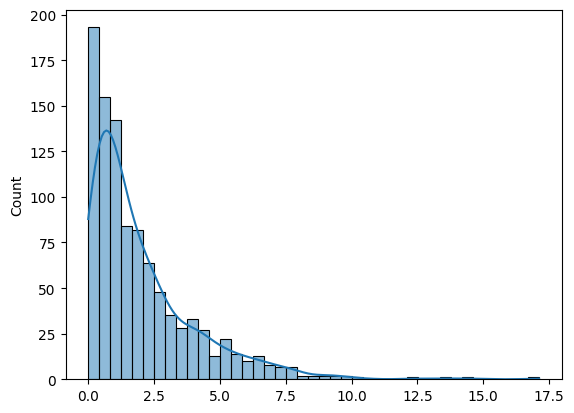

In [39]:
sns.histplot(data, kde=True)

In [25]:
data

array([7.95874508e-01, 1.25593076e+00, 9.23223146e-01, 7.87201152e-01,
       5.51048491e-01, 1.03815929e+00, 5.75519199e-01, 2.22352441e+00,
       3.31491218e+00, 4.83602101e-01, 1.56889614e+00, 7.52674110e-01,
       8.39432847e-01, 2.59825415e+00, 7.36853549e-02, 9.11610291e-02,
       2.04255867e-02, 1.78748768e+00, 1.50578423e+00, 2.04031428e+00,
       3.84522184e+00, 1.60523956e+00, 6.18929459e-01, 1.51653598e+00,
       1.25874412e-01, 1.02143189e+00, 1.54729683e-01, 2.89442045e+00,
       7.37827278e-01, 5.35565718e-01, 3.07280353e-01, 1.48825484e+00,
       6.09082416e-01, 8.40334707e-01, 1.89685717e-02, 9.61380929e-01,
       9.46996678e-01, 9.59547973e-01, 2.87791508e+00, 1.14513896e+00,
       4.45518493e-01, 5.74532409e-01, 1.19610780e+00, 6.21152959e-02,
       1.09891248e+00, 1.11059743e+00, 2.36206705e-01, 1.38028688e-01,
       3.78961966e-01, 4.52102056e-01, 8.44427781e-01, 5.77324311e-01,
       4.45449738e+00, 1.07635113e-01, 2.34301516e-01, 1.75913553e-01,
      

In [47]:
data.sort_values(by='number', ascending=False)

,number
974,17.122062
619,14.466954
149,13.530787
595,12.391819
478,10.370259
...,...
99,0.009413
742,0.007736
540,0.005414
757,0.002769


In [68]:
from sklearn.preprocessing import PowerTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo = PowerTransformer(method = 'yeo-johnson')

data['Box_cox'] = pt_boxcox.fit_transform(data[['number']])
data

,number,Box_cox,Yeo,Quantile
0,1.591749,0.491988,0.179335,0.162552
1,2.511862,1.031744,0.677331,0.587964
2,1.846446,0.661110,0.339698,0.286135
3,1.574402,0.479742,0.167607,0.157469
4,1.102097,0.098367,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,-1.314369,-1.390405,-1.315958
996,1.446892,0.386435,0.077828,0.074087
997,5.574577,2.130585,1.527375,1.475269
998,0.519217,-0.606093,-0.862872,-0.748009


<Axes: xlabel='Box_cox', ylabel='Count'>

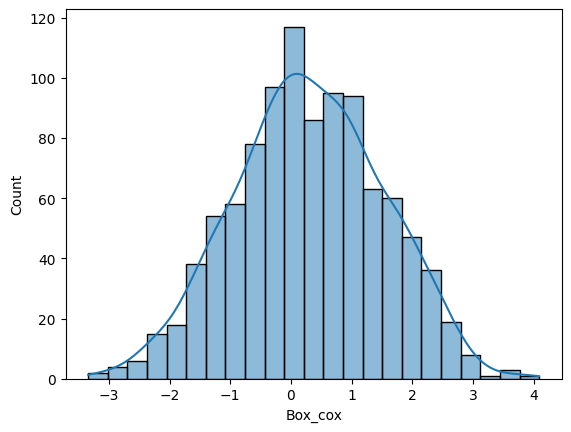

In [69]:
sns.histplot(data['Box_cox'], kde=True)

In [57]:
data['Yeo'] = pt_yeo.fit_transform(data[['number']])
data

,number,Box_cox,Yeo
0,1.591749,0.158969,0.179335
1,2.511862,0.602906,0.677331
2,1.846446,0.298068,0.339698
3,1.574402,0.148897,0.167607
4,1.102097,-0.164776,-0.202107
...,...,...,...
995,0.205564,-1.326721,-1.390405
996,1.446892,0.072154,0.077828
997,5.574577,1.506681,1.527375
998,0.519217,-0.744179,-0.862872


<Axes: xlabel='Yeo', ylabel='Count'>

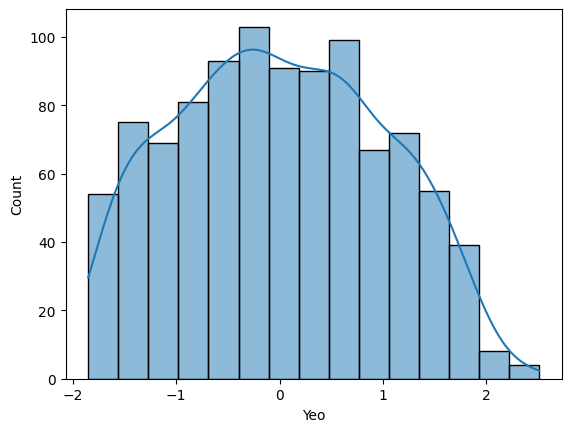

In [58]:
sns.histplot(data['Yeo'], kde=True)

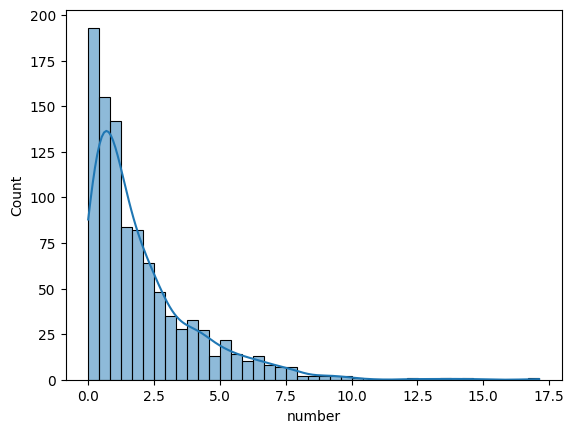

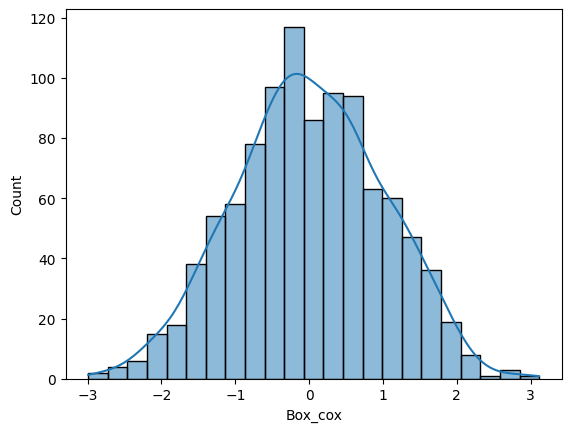

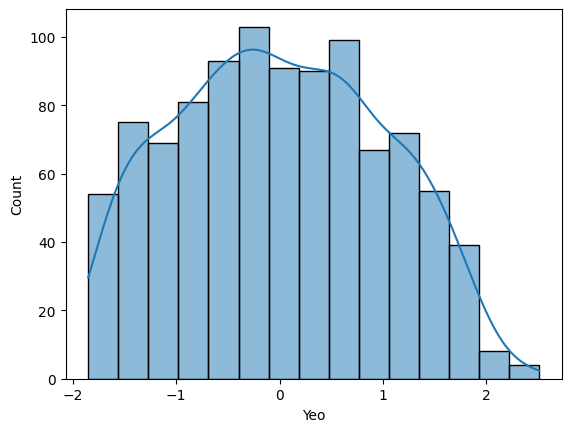

In [59]:
for col in data.columns:
    sns.histplot(data[col], kde=True)
    plt.show()

In [60]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

data['Quantile'] = qt.fit_transform(data[['number']])

data

,number,Box_cox,Yeo,Quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,-1.326721,-1.390405,-1.315958
996,1.446892,0.072154,0.077828,0.074087
997,5.574577,1.506681,1.527375,1.475269
998,0.519217,-0.744179,-0.862872,-0.748009


<Axes: xlabel='Quantile', ylabel='Count'>

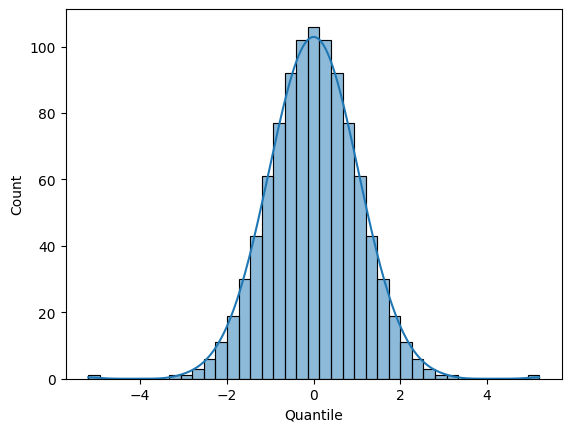

In [63]:
sns.histplot(data['Quantile'], kde=True)

In [64]:
data

,number,Box_cox,Yeo,Quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,-1.326721,-1.390405,-1.315958
996,1.446892,0.072154,0.077828,0.074087
997,5.574577,1.506681,1.527375,1.475269
998,0.519217,-0.744179,-0.862872,-0.748009


<Axes: >

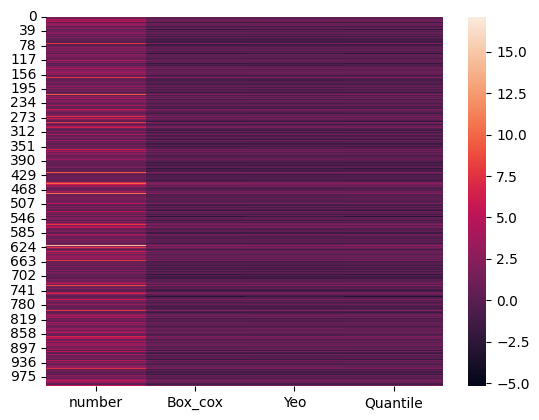

In [65]:
sns.heatmap(data)

In [93]:
# creating skewed data
np.random.seed(0)

df = {'Values': [1,5,10,20,50,100,200,500,1000,2000,5000,10000,50000,100000]}

df = pd.DataFrame(df)
df

,Values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: ylabel='Count'>

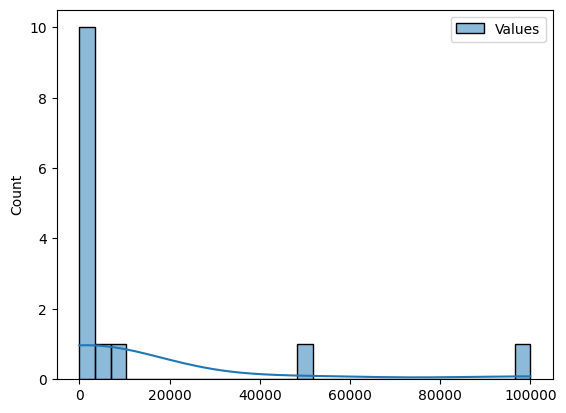

In [72]:
sns.histplot(df, kde=True)

In [94]:
df_log = np.log(df)
df_log

,Values
0,0.000000
1,1.609438
2,2.302585
3,2.995732
4,3.912023
5,4.605170
6,5.298317
7,6.214608
8,6.907755
9,7.600902


<Axes: ylabel='Count'>

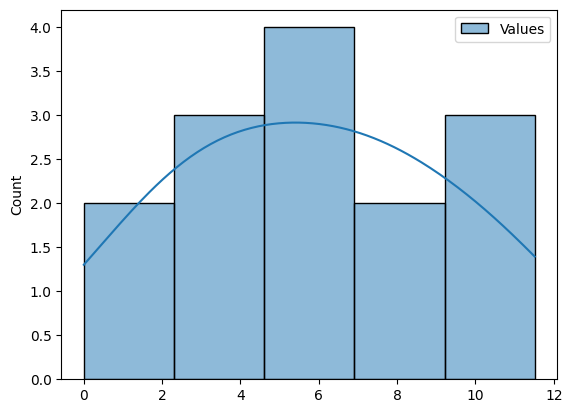

In [80]:
sns.histplot(df_log, kde=True)

In [82]:
df.merge(df_log)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_19912\181380485.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df.merge(df_log)


,Values


In [97]:
df = pd.concat([df, df_log], axis=1)
df

,Values,Values,Values
0,1,0.000000,0.000000
1,5,1.609438,1.609438
2,10,2.302585,2.302585
3,20,2.995732,2.995732
4,50,3.912023,3.912023
5,100,4.605170,4.605170
6,200,5.298317,5.298317
7,500,6.214608,6.214608
8,1000,6.907755,6.907755
9,2000,7.600902,7.600902


In [98]:
# concatenate df_log to df

df.drop(df['Values'])


KeyError: "['Values', 'Values', 'Values'] not found in axis"

In [100]:
# drop df column

df.drop('Values', axis=1, inplace=True)